Lab 02

Tăng Mỹ Hân

22520395

Bài 1

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/DS102/BTTH Buổi 2

/content/drive/MyDrive/Colab Notebooks/DS102/BTTH Buổi 2


In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('./data.csv', sep=';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Preprocessing data

In [6]:
df.isna().sum(axis="index")

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance\t,0
Previous qualification,0
Previous qualification (grade),0
Nacionality,0
Mother's qualification,0
Father's qualification,0


In [7]:
df.dtypes

,0
Marital status,int64
Application mode,int64
Application order,int64
Course,int64
Daytime/evening attendance\t,int64
Previous qualification,int64
Previous qualification (grade),float64
Nacionality,int64
Mother's qualification,int64
Father's qualification,int64


In [8]:
print(df['Target'].unique())

['Dropout' 'Graduate' 'Enrolled']


In [9]:
def encode_target(value: str) -> int:
  if value == "Enroll" or value == "Dropout":
    return 0
  return 1

In [10]:
df["Target"] = df["Target"].apply(encode_target)

In [11]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


# Normalizing data

In [12]:
continuous_columns = [
    'Previous qualification (grade)',
    'Admission grade',
    'Unemployment rate',
    'Inflation rate',
    'GDP',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)'
]
for column in continuous_columns:
  df[column] = (df[column] - df[column].mean()) / df[column].std()

In [13]:
print(df['Course'].unique())

[ 171 9254 9070 9773 8014 9991 9500 9238 9670 9853 9085 9130 9556 9147
 9003   33 9119]


In [14]:
course_mapping = df['Course'].unique()
course_mapping = {course_mapping[i]: i for i in range(len(course_mapping))}

df['Course'] = df['Course'].map(course_mapping)

In [15]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,0,1,1,-0.804750,1,19,12,...,0,0,0,0,-1.963267,0,-0.287606,0.124372,0.765674,0
1,1,15,1,1,1,1,2.076585,1,1,3,...,0,6,6,6,0.659487,0,0.876123,-1.105097,0.347160,1
2,1,1,5,2,1,1,-0.804750,1,37,37,...,0,6,0,0,-1.963267,0,-0.287606,0.124372,0.765674,0
3,1,17,2,3,1,1,-0.804750,1,38,37,...,0,6,10,5,0.416403,0,-0.813161,-1.466705,-1.375356,1
4,2,39,1,4,0,1,-2.472892,1,37,38,...,0,6,6,6,0.531548,0,0.876123,-1.105097,0.347160,1


In [ ]:
def split_data(df, test_size=0.2):
  X_y = df.to_numpy()
  N = df.shape[0]
  split_index = int(N * (1 - test_size)) 

  X_y_train, X_y_test = np.split(X_y, indices_or_sections=[split_index])  

  X_train, X_test = X_y_train[:, :-1], X_y_test[:, :-1]  
  y_train, y_test = X_y_train[:, -1], X_y_test[:, -1]

  return X_train, X_test, y_train, y_test  

In [19]:
X_train, X_test, y_train, y_test = split_data(df)

In [20]:
X_train.shape

(3539, 36)

In [21]:
y_train.shape

(3539,)

In [22]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [23]:
y_train.shape

(3539, 1)

In [24]:
from tqdm import tqdm

class LogisticRegression:
  def __init__(self, epoch: int, lr: float) -> None:
    self.epoch = epoch
    self.lr = lr
    self.losses = []
    self.metrics = []

  def sigmoid(self, z: np.ndarray) -> np.ndarray:
    return 1 / (1 + np.exp(-z))

  def loss_fn(self, y: np.ndarray, y_hat: np.ndarray) -> float:
    return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

  def accuracy(self, y: np.ndarray, y_hat: np.ndarray) -> float:
    return (1 - np.abs(y - y_hat)).mean()

  def fit(self, X: np.ndarray, y: np.ndarray) -> None:
    n = X.shape[0]
    d = X.shape[1]
    self.theta = np.zeros((d, 1))
    with tqdm(range(self.epoch)) as pb:
      for e in pb:
        # forward
        pb.set_description(f"Epoch {e + 1}")
        y_hat = self.predict(X)

        # backward
        diff = y_hat - y
        gradient = 1/n * np.matmul(X.T, diff)
        self.theta -= self.lr*gradient

        # evaluating
        y_hat = self.predict(X)
        loss = self.loss_fn(y, y_hat)
        acc = self.accuracy(y, y_hat)
        pb.set_postfix({
            "loss": loss,
            "acc": acc
        })
        self.losses.append(loss)
        self.metrics.append(acc)

  def predict(self, X: np.ndarray) -> np.ndarray:
    z = np.matmul(X, self.theta)
    y_hay = self.sigmoid(z)
    return y_hay

In [25]:
logistic_reg = LogisticRegression(epoch=1000, lr=0.01)
logistic_reg.fit(X_train, y_train)

Epoch 3:   0%|          | 0/1000 [00:00<?, ?it/s, loss=2.16, acc=0.357]<ipython-input-24-9f2cecc824c7>:14: RuntimeWarning: divide by zero encountered in log
  return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
<ipython-input-24-9f2cecc824c7>:14: RuntimeWarning: invalid value encountered in multiply
  return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
Epoch 1000: 100%|██████████| 1000/1000 [00:02<00:00, 360.02it/s, loss=0.532, acc=0.808]


In [26]:
predicted = logistic_reg.predict(X_test)
print(f"Accuracy: {logistic_reg.accuracy(y_test, predicted)}")

Accuracy: 0.7790459732064453


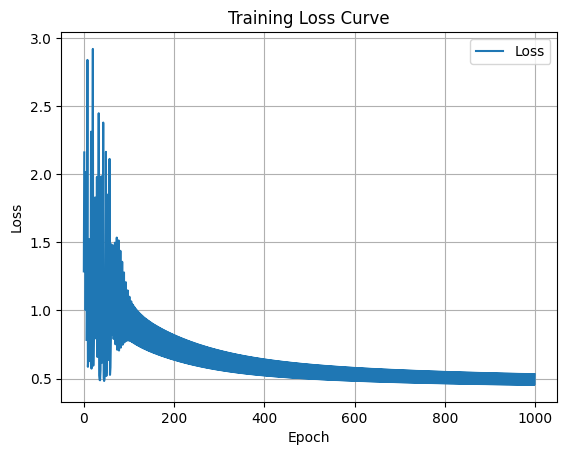

In [27]:
plt.plot(logistic_reg.losses, label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Training Loss Curve')
plt.legend()
plt.grid()
plt.show()